# 🧪 NYC Yellow Taxi Fare Statistical Analysis
This notebook performs statistical analysis on NYC Yellow Taxi data to determine if there's a significant difference in average fare based on payment type (`Card` vs `Cash`).

## 📥 Importing Libraries and Dataset

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Load dataset (update the path as per your local setup)
df = pd.read_csv('C:/Users/rajga/Desktop/Statistics Project(Python)/yellow_tripdata_2020-01.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## 🧹 Data Preprocessing

In [55]:
# Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [57]:
# Calculate duration in minutes
df['Duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [59]:
# Keep only relevant columns
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'Duration']]

In [61]:
# Drop rows with null values
df.dropna(inplace=True)

In [63]:
# Convert data types
df['passenger_count'] = df['passenger_count'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)

In [65]:
# Remove duplicates
df = df.drop_duplicates()

In [69]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [71]:
# Keep only valid payment types and passenger counts
df = df[df['payment_type'] < 3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [73]:
# Replace payment_type with labels
df['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace=True)

In [75]:
# Remove invalid (<=0) values
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0) & (df['Duration'] > 0)]

## 📊 Outlier Removal using IQR

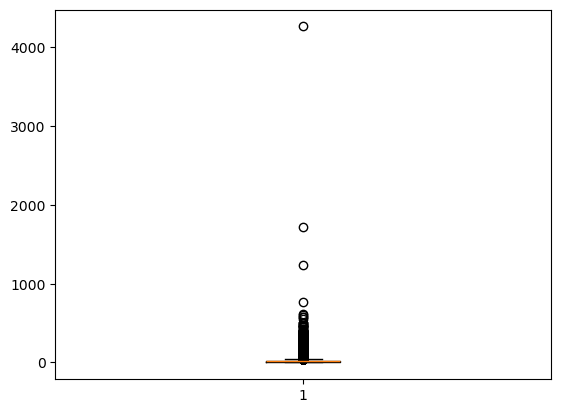

In [79]:
plt.boxplot(df['fare_amount'])
plt.show()

In [81]:
# Remove outliers using IQR method
for col in ['fare_amount', 'trip_distance', 'Duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

## 📈 Visualization

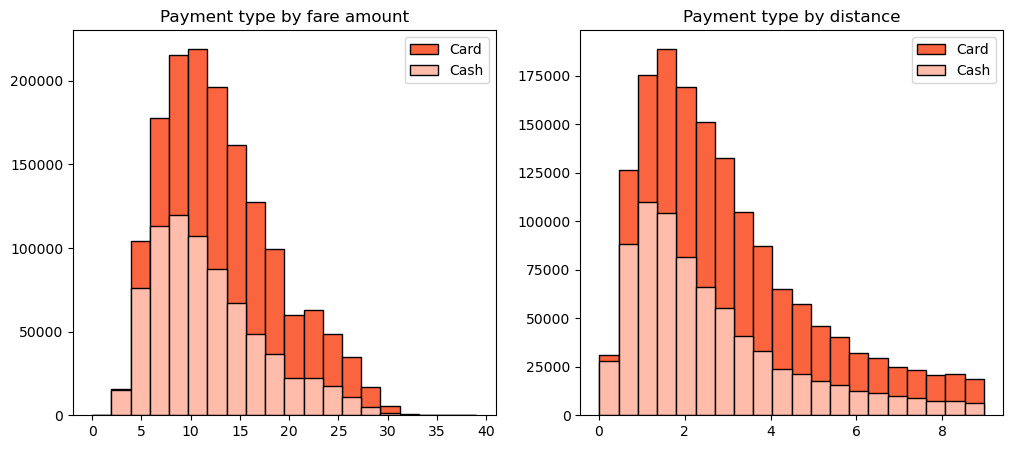

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Payment type by fare amount")
#df_new.plot(kind='hist', x='payment_type',y='fare_amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype='barstacked',bins=20, edgecolor='k', color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype='barstacked',bins=20, edgecolor='k', color='#FFBCAB', label='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title("Payment type by distance")
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype='barstacked',bins=20, edgecolor='k', color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype='barstacked',bins=20, edgecolor='k', color='#FFBCAB', label='Cash')
plt.legend()

plt.show()

## 🧪 Hypothesis Testing
**H₀ (Null Hypothesis):** No difference in average fare between Card and Cash payments

**H₁ (Alternate Hypothesis):** There is a difference in average fare

In [87]:
# Split data
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

# Perform Welch's t-test
t_stats, p_value = stats.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print('T-Statistic:', t_stats)
print('P-Value:', p_value)

T-Statistic: 169.2111527245052
P-Value: 0.0


## ✅ Conclusion
Since the P-value is less than 0.05, we reject the null hypothesis.
There is a statistically significant difference in average fare between Card and Cash payments.